# Real Estate Price Predictor

        This project aims to predict the prices of a house based on the following features: the house's area, bedrooms, bathrooms, and stories. In addition, there are multiple 0 or 1 features: the presence of a guestroom, basement, water heating, air conditioning, parking spots, furnishing status, proximity to a mainroad, and whether the house is established in a preferred area.

*Notebook Created: December 31, 2022*

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns

### Importing Dataset to Pandas

In [2]:
df = pd.read_csv("realestateDataset.csv")

#returns first five rows of dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [3]:
#shape of dataframe
rows, columns = df.shape
print(f"There are {rows} rows in the dataset.")
print(f"There are {columns} columns in the dataset.")


#check for null values
print(f"There are {df.isnull().sum().sum()} null values in the dataset.")

There are 545 rows in the dataset.
There are 13 columns in the dataset.
There are 0 null values in the dataset.


### Description of Values

In [4]:
#description of values
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


### Understanding Correlation of Values in the Dataframe

<AxesSubplot:>

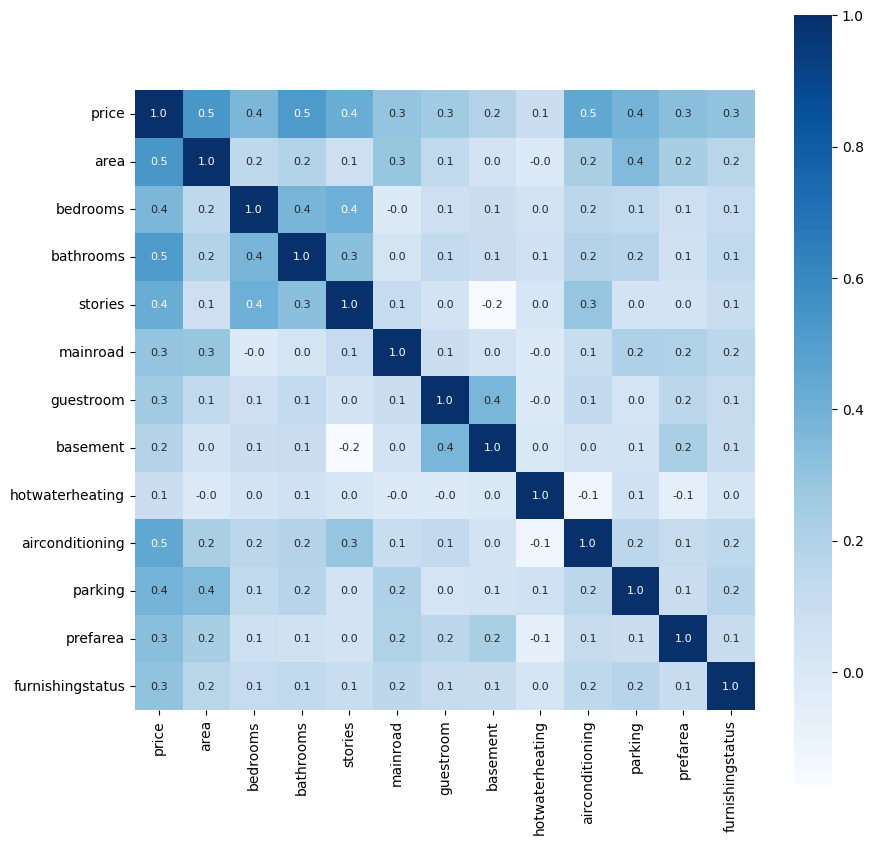

In [5]:
correlation = df.corr()

#constructing a heatmap  to describe correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt= ".1f", annot=True, annot_kws={'size':8},cmap= "Blues")

### Splitting the Data

In [6]:
#split the data into price and features
X = df.drop(['price'], axis= 1)
Y = df['price']
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,7420,4,1,2,1,1,1,0,1,2,0,1.0


### Splitting into Test and Training Data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.05 ,random_state= 2)
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
333,3000,3,1,2,1,0,0,0,0,0,0,0.5
84,3760,3,1,2,1,0,0,1,0,2,0,0.5
439,3930,2,1,1,0,0,0,0,0,0,0,0.0
396,3640,2,1,1,1,0,0,0,0,1,0,0.5
161,6100,3,1,3,1,1,0,0,1,0,1,0.5


### Training with Model

In [8]:
#loading the model
model = XGBRegressor()

#training with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

## Evaluation

### Prediction on Training Data

In [9]:
#accuracy for prediction on training data

training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 3544599.2  2415704.8  4015049.2  4125382.8  4266570.   5463295.
  5977753.   6935534.5  2678986.5  6900398.   5447259.5  3059324.2
  5886572.5  2580388.   3719732.8  4178698.5  2844150.   3727179.
  3263575.8  4801190.   4824536.   4014957.  12259366.   5361880.
  2392238.   3127806.5  3151793.8  5597179.   8742301.   4568078.
  2192190.5  3930045.8  3133292.   3608622.5  4094234.   7337513.
  8402299.   4772634.   4198068.5  4965156.   3224911.2  4209014.
  4954103.5  5160273.   6053779.   5965384.   8700458.   3320999.5
  5468745.5  4571981.  10132802.   6075642.   6155563.   4614745.
  4203894.   2385669.5  3502431.8  3651027.8  8574207.   8014430.
  4639120.5  4968408.   4133156.5  4781349.   4625718.5  6452731.
  4840004.5  8572466.   9291130.   4768667.5  4752473.   3346933.
  8203634.5  4072090.2  6773355.5  3733221.2  6290472.   3672567.
  5232481.5  4556435.   8717672.   3451148.   4274209.5  2711746.
  4663037.   4172737.   6969309.   2928330.2  2699249.   6932513.
  466983

In [10]:
#R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#MeanAbsoluteError
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(f"R Squared Error: ", score_1)
print(f"Mean Absolute Error", score_2)

R Squared Error:  0.9952219115362445
Mean Absolute Error 82608.27611218569


### Vizualization

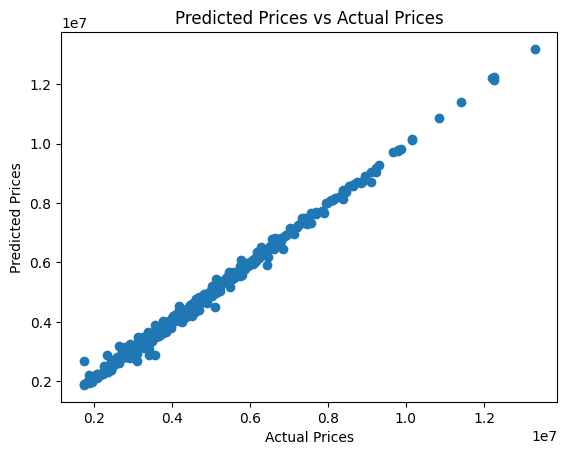

In [11]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.show()

### Prediction on Test Data

In [12]:
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [13]:
#R Squared Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#MeanAbsoluteError
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R Squared Error: ", score_1)
print(f"Mean Absolute Error", score_2)

R Squared Error:  0.6461876247882663
Mean Absolute Error 638203.3214285715


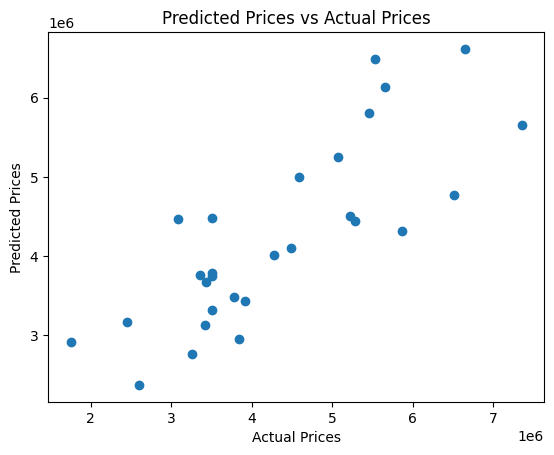

In [14]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.show()